# 수자원공사의 적산차 예측

# Data Preprocessing

## Training data

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

data_train = pd.read_csv("data_tr_city.csv")
data_train

,datetime,구미 혁신도시배수지 유출유량 적산차
0,2017-01-01 01:00:00,138.0
1,2017-01-01 02:00:00,237.0
2,2017-01-01 03:00:00,128.0
3,2017-01-01 04:00:00,14.0
4,2017-01-01 05:00:00,11.0
...,...,...
35058,2020-12-31 19:00:00,328.0
35059,2020-12-31 20:00:00,347.0
35060,2020-12-31 21:00:00,335.0
35061,2020-12-31 22:00:00,141.0


In [4]:
data_train.info()
#null값 존재 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             35063 non-null  object 
 1   구미 혁신도시배수지 유출유량 적산차  35055 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB


In [5]:
data_train.describe()
#수치 확인 및 이상치 발견

,구미 혁신도시배수지 유출유량 적산차
count,3.505500e+04
mean,1.236927e+02
std,4.342471e+04
min,-6.093821e+06
25%,1.030000e+02
50%,2.170000e+02
75%,3.460000e+02
max,4.720655e+06


In [6]:
data_train = data_train.rename(columns=  {"구미 혁신도시배수지 유출유량 적산차":"y"})

In [7]:
data_train.sort_values(ascending=True, by="y")

,datetime,y
17558,2019-01-02 15:00:00,-6093821.0
2127,2017-03-30 16:00:00,-2584551.0
3473,2017-05-25 18:00:00,0.0
3471,2017-05-25 16:00:00,0.0
3469,2017-05-25 14:00:00,0.0
...,...,...
12717,2018-06-14 22:00:00,NaN
13187,2018-07-04 12:00:00,NaN
13234,2018-07-06 11:00:00,NaN
27253,2020-02-10 14:00:00,NaN


In [ ]:
data_train.drop(index= [17558, 2127], inplace=True)
data_train.drop(index=11995, inplace=True)

data_train.dropna(inplace=True)
data_train["y"] = data_train["y"].astype(int)

In [17]:
data_train.iloc[:,1].value_counts().sort_values() == 1
# train data의 데이터중 분포가 1개인 값만 확인

740     True
692     True
850     True
752     True
727     True
       ...  
17     False
18     False
16     False
14     False
15     False
Name: y, Length: 803, dtype: bool

In [27]:
drop_table = data_train.iloc[:,1].value_counts().sort_values() ==1
#drop table 생성
drop_table = drop_table.reset_index(name="drop")
drop_table = drop_table.rename(columns=  {"index":"y"})
test = pd.merge(data_train, drop_table, how='left', on = "y")
drop_table = test["drop"]
data_train = test.loc[~drop_table]
data_train.drop(columns="drop", inplace= True)

data_train

,datetime,y
0,2017-01-01 01:00:00,138
1,2017-01-01 02:00:00,237
2,2017-01-01 03:00:00,128
3,2017-01-01 04:00:00,14
4,2017-01-01 05:00:00,11
...,...,...
35047,2020-12-31 19:00:00,328
35048,2020-12-31 20:00:00,347
35049,2020-12-31 21:00:00,335
35050,2020-12-31 22:00:00,141


In [28]:
data_train.nlargest(10, columns="y")


,datetime,y
25141,2019-11-14 23:00:00,843
32696,2020-09-24 20:00:00,843
21047,2019-05-28 09:00:00,817
27275,2020-02-11 23:00:00,817
21796,2019-06-28 14:00:00,789
28088,2020-03-16 20:00:00,789
27798,2020-03-04 18:00:00,787
31186,2020-07-23 22:00:00,787
5275,2017-08-08 23:00:00,778
27776,2020-03-03 20:00:00,778


### Resampling

In [29]:
data_train['datetime'] = pd.to_datetime(data_train['datetime'], format='%Y-%m-%d %H:%M:%S')
data_train.set_index('datetime', inplace=True, drop=True)
data_train["y"] = data_train.loc[:,"y"].astype(int)

C:\Users\ppjjh\AppData\Local\Temp\ipykernel_22312\2708021383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['datetime'] = pd.to_datetime(data_train['datetime'], format='%Y-%m-%d %H:%M:%S')
C:\Users\ppjjh\AppData\Local\Temp\ipykernel_22312\2708021383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["y"] = data_train.loc[:,"y"].astype(int)


In [30]:
data_train

,y
datetime,
2017-01-01 01:00:00,138
2017-01-01 02:00:00,237
2017-01-01 03:00:00,128
2017-01-01 04:00:00,14
2017-01-01 05:00:00,11
...,...
2020-12-31 19:00:00,328
2020-12-31 20:00:00,347
2020-12-31 21:00:00,335


In [31]:

data_train = data_train.asfreq(freq='H',method='ffill')
# 제거되었던 91(80+11)개의 결측값이 ffill(과거값)을 통해 새로 작성됨
data_train
#총 35063개의 row

,y
datetime,
2017-01-01 01:00:00,138
2017-01-01 02:00:00,237
2017-01-01 03:00:00,128
2017-01-01 04:00:00,14
2017-01-01 05:00:00,11
...,...
2020-12-31 19:00:00,328
2020-12-31 20:00:00,347
2020-12-31 21:00:00,335


In [32]:
data_train.isnull().sum()

y    0
dtype: int64

In [33]:
data_train.asfreq('H')[data_train.asfreq('H').isnull().sum(axis=1) > 0]
# 시계열 데이터 결측치 확인

,y
datetime,


In [34]:
data_train.describe()

,y
count,35063.000000
mean,235.260445
std,159.191451
min,0.000000
25%,103.000000
50%,217.000000
75%,346.000000
max,843.000000


## Test Data

In [35]:
data_test = pd.read_csv("data_ts_city.csv")

In [36]:
data_test.info()
#null값 존재 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8424 entries, 0 to 8423
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             8424 non-null   object 
 1   구미 혁신도시배수지 유출유량 적산차  8424 non-null   float64
dtypes: float64(1), object(1)
memory usage: 131.8+ KB


In [37]:
data_test.describe()
#수치 확인 및 이상치 없음

,구미 혁신도시배수지 유출유량 적산차
count,8424.000000
mean,260.544160
std,171.825882
min,0.000000
25%,118.000000
50%,233.000000
75%,375.000000
max,1350.000000


In [38]:
data_test = data_test.rename(columns=  {"구미 혁신도시배수지 유출유량 적산차":"y"})

In [39]:
data_test.sort_values(ascending=True, by="y")

,datetime,y
1501,2021-03-04 13:00:00,0.0
6557,2021-10-01 05:00:00,15.0
5094,2021-08-01 06:00:00,23.0
5382,2021-08-13 06:00:00,23.0
4420,2021-07-04 04:00:00,24.0
...,...,...
6970,2021-10-18 10:00:00,945.0
6690,2021-10-06 18:00:00,972.0
717,2021-01-30 21:00:00,1000.0
6994,2021-10-19 10:00:00,1007.0


In [40]:
data_test.sort_values(ascending=False, by="y")


,datetime,y
1502,2021-03-04 14:00:00,1350.0
6994,2021-10-19 10:00:00,1007.0
717,2021-01-30 21:00:00,1000.0
6690,2021-10-06 18:00:00,972.0
6970,2021-10-18 10:00:00,945.0
...,...,...
4493,2021-07-07 05:00:00,24.0
5094,2021-08-01 06:00:00,23.0
5382,2021-08-13 06:00:00,23.0
6557,2021-10-01 05:00:00,15.0


In [41]:
data_test.isnull().sum()

datetime    0
y           0
dtype: int64

### Resampling

In [42]:
data_test['datetime'] = pd.to_datetime(data_test['datetime'], format='%Y-%m-%d %H:%M:%S')
data_test.set_index('datetime', inplace=True, drop=True)
data_test["y"] = data_test.loc[:,"y"].astype(int)

In [43]:
data_test

,y
datetime,
2021-01-01 00:00:00,106
2021-01-01 01:00:00,184
2021-01-01 02:00:00,277
2021-01-01 03:00:00,197
2021-01-01 04:00:00,72
...,...
2021-12-17 19:00:00,327
2021-12-17 20:00:00,513
2021-12-17 21:00:00,396


In [44]:

data_test = data_test.asfreq(freq='H',method='ffill')

In [45]:
data_test

,y
datetime,
2021-01-01 00:00:00,106
2021-01-01 01:00:00,184
2021-01-01 02:00:00,277
2021-01-01 03:00:00,197
2021-01-01 04:00:00,72
...,...
2021-12-17 19:00:00,327
2021-12-17 20:00:00,513
2021-12-17 21:00:00,396


In [46]:
data_test.asfreq('H')[data_test.asfreq('H').isnull().sum(axis=1) > 0]
# 결측치 확인

,y
datetime,


# 데이터 분석

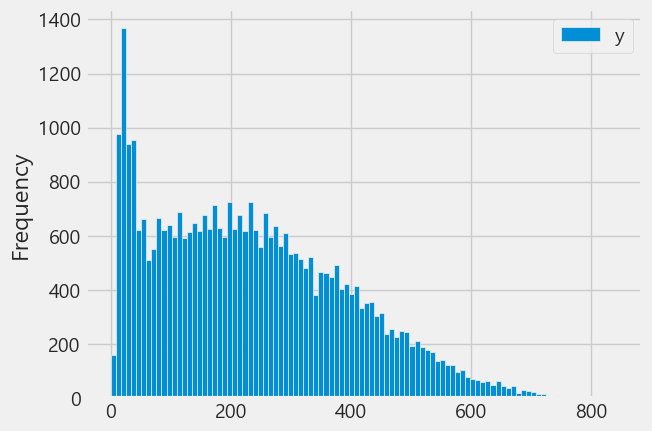

In [47]:
data_train.plot(kind="hist", y="y", bins=100)
sns.set(rc = {"figure.figsize":(15,8)})
plt.show()

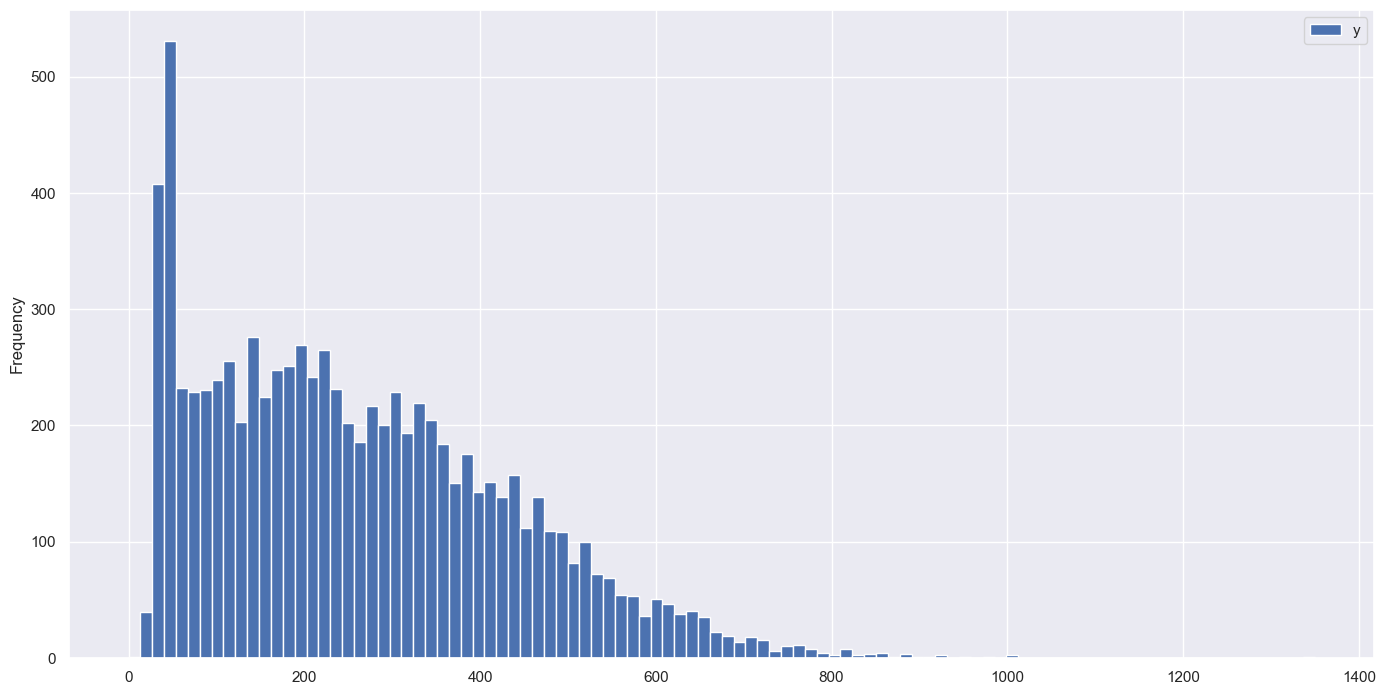

In [48]:
data_test.plot(kind="hist", y="y", bins=100)
plt.show()


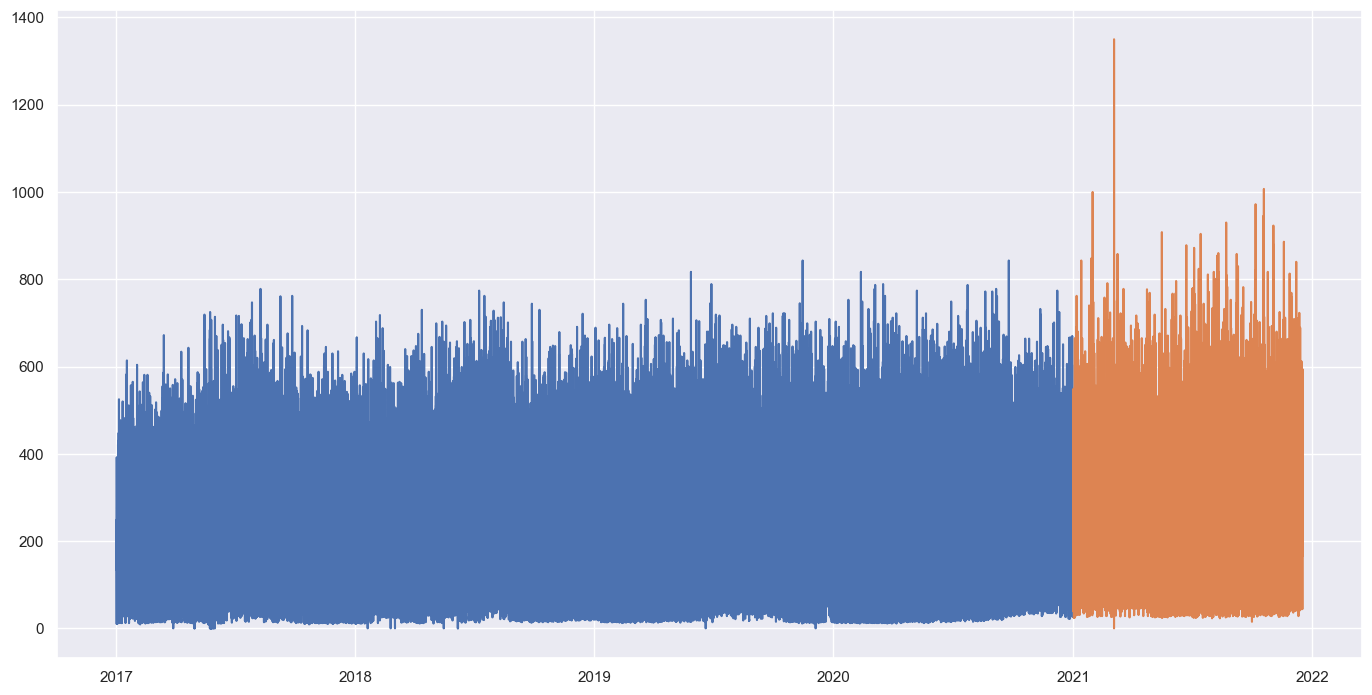

In [49]:
plt.plot(data_train)
plt.plot(data_test)
plt.show()

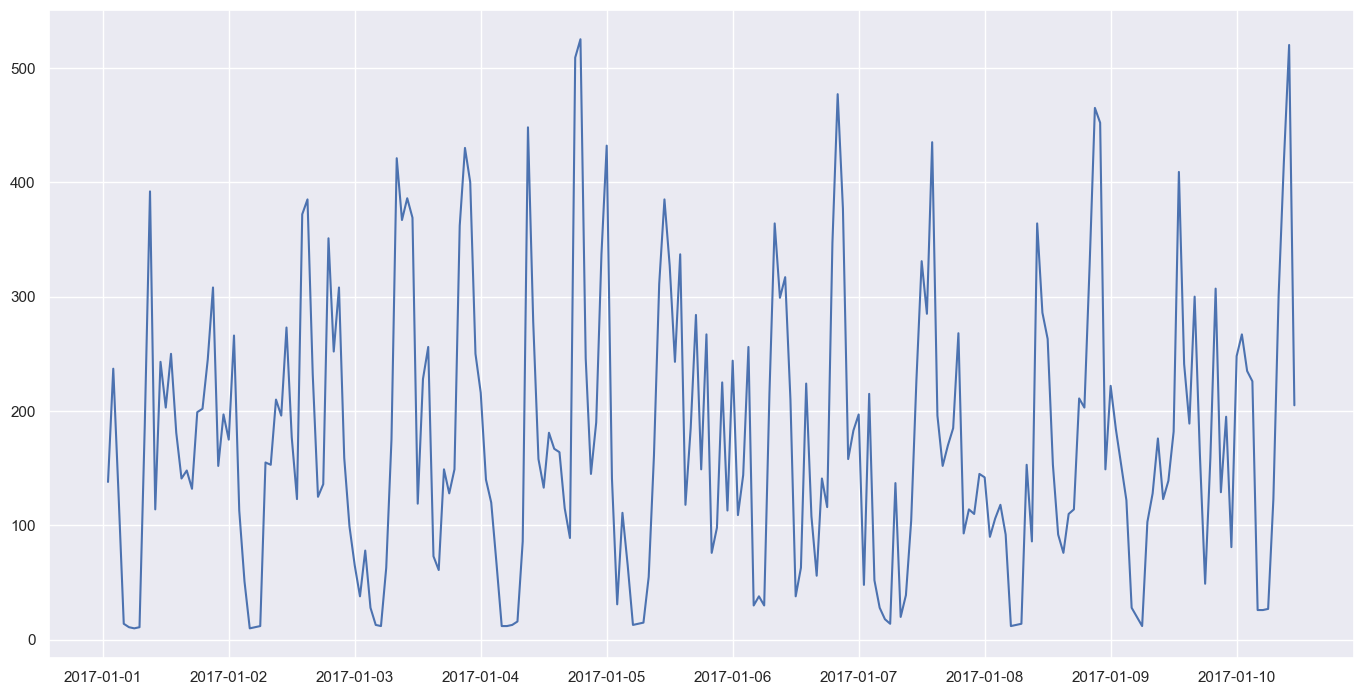

In [50]:
plt.plot(data_train.loc[:"2017-01-10 11:00:00"])
plt.show()

>열흘간의 데이터 관측결과 데이터의 변동성이 큰 것을 확인(시간당 데이터)

In [51]:
import pandas_profiling, pipdeptree
# 놓친 부분을 확인하기 위해 새로운 라이브러리 import

visions.backends INFO  Pandas backend loaded 1.5.1
visions.backends INFO  Numpy backend loaded 1.21.5
visions.backends INFO  Pyspark backend NOT loaded
visions.backends INFO  Python backend loaded
C:\Users\ppjjh\anaconda3\envs\test\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [52]:
pr_train=data_train.profile_report()
pr_train.to_file('./pr_train_report.html')
pr_test=data_test.profile_report()
pr_test.to_file('./pr_test_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
pr_train

In [54]:
pr_test

<AxesSubplot:ylabel='y'>

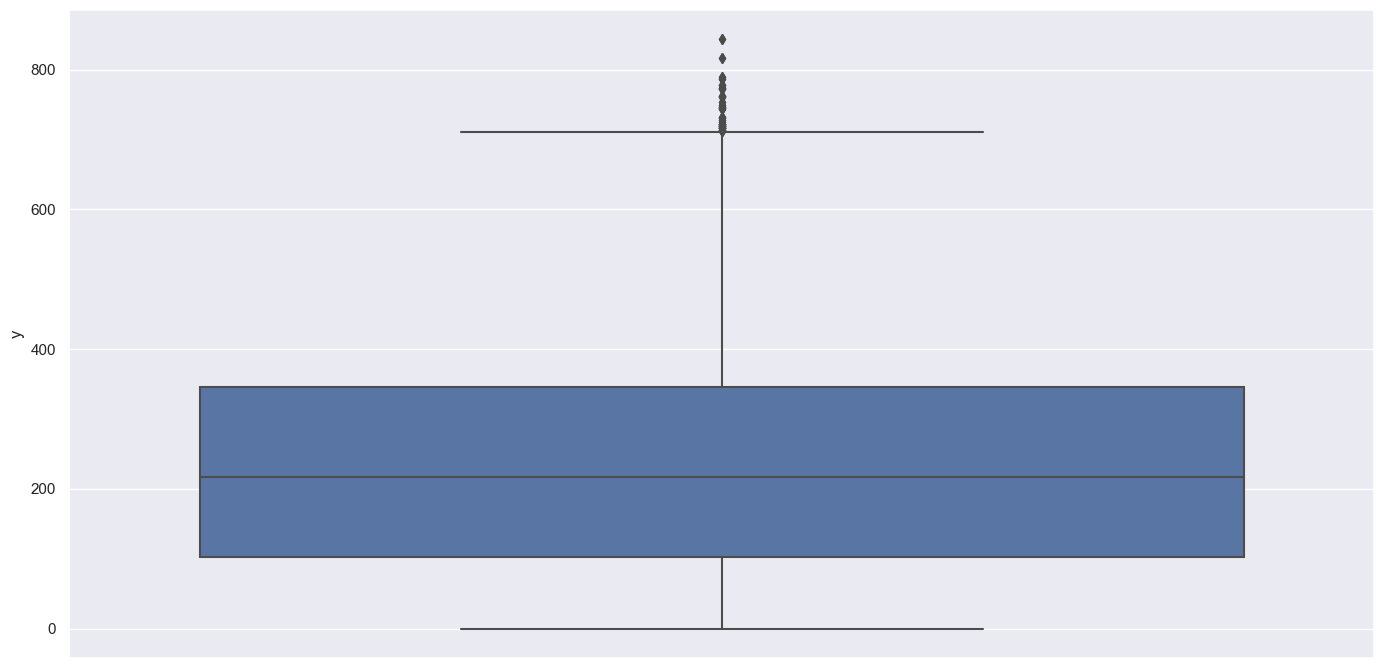

In [55]:
sns.set(style="darkgrid")
sns.boxplot(y='y', data=data_train)

<AxesSubplot:ylabel='y'>

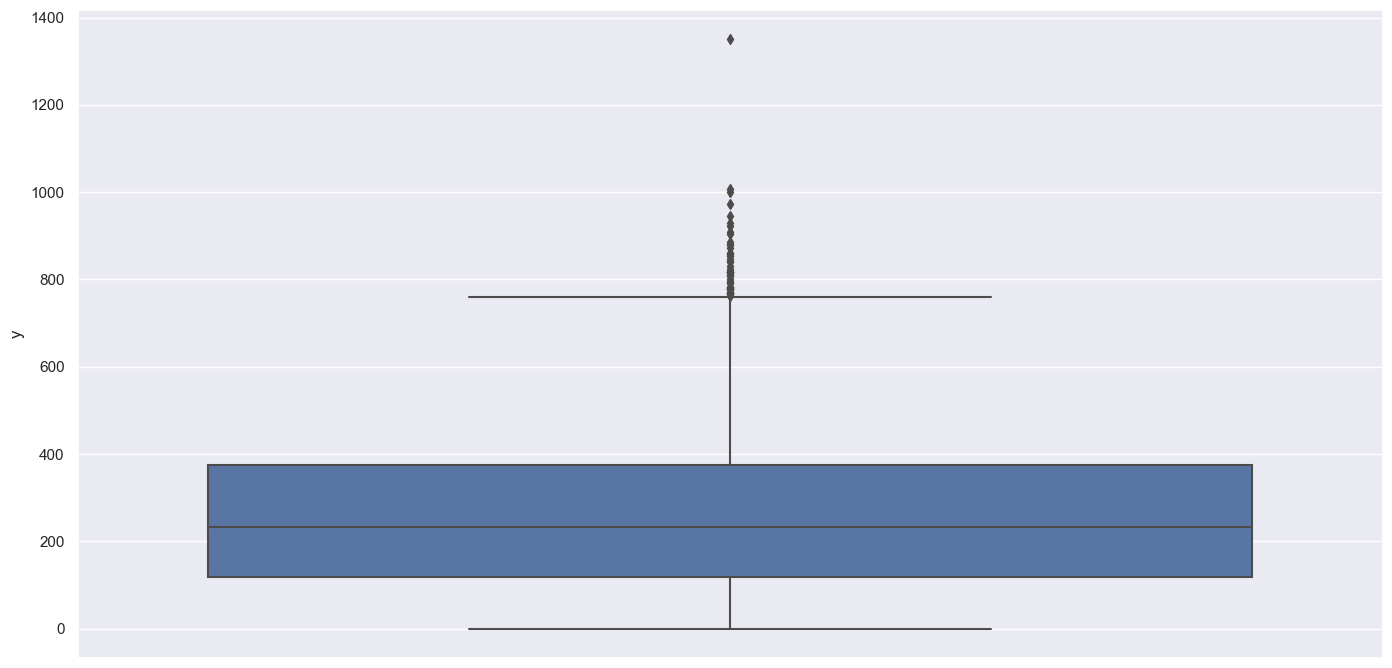

In [56]:
sns.boxplot(y='y', data=data_test)

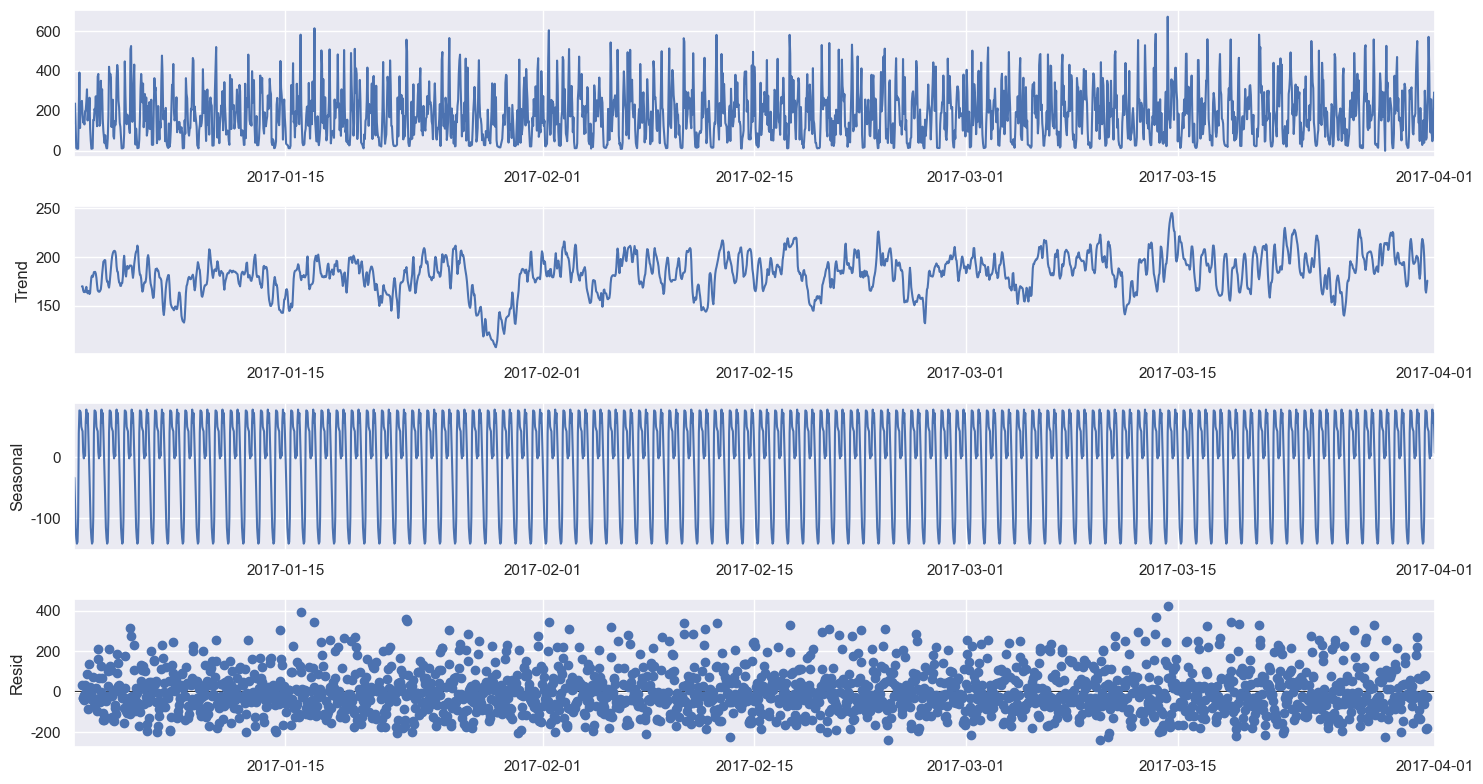

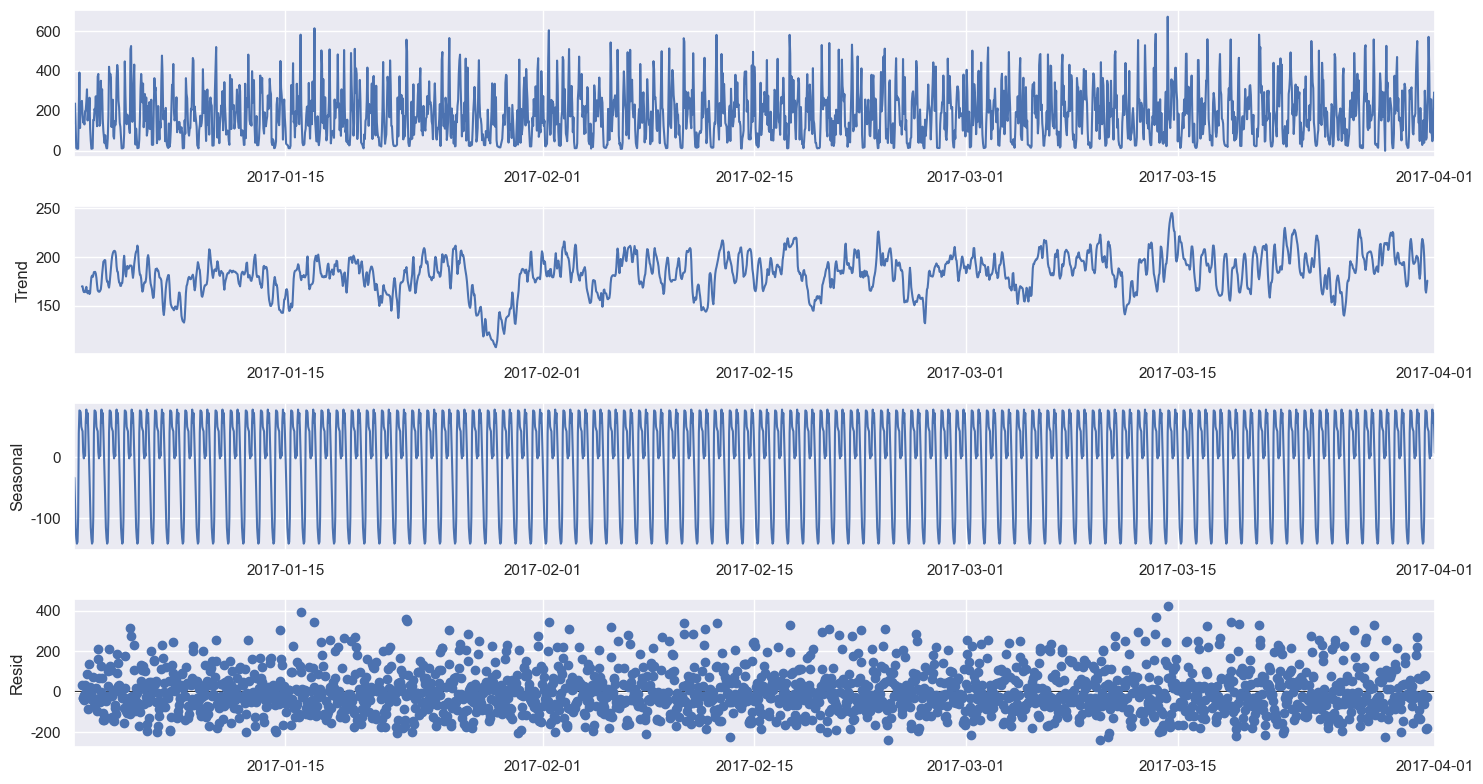

In [57]:
# 시계열 STL 확인
import statsmodels.api as sm
#iloc의 행갯수를 통해 시간, 일, 분기, 반기 등 분석
train_result = sm.tsa.seasonal_decompose(data_train.iloc[:24*90], model="additive")
train_result.plot(
    train_result,
         # observed= False,
         # seasonal: bool = True,
         # trend: bool = True,
         # resid: bool = True,
         # weights= True
                )

In [58]:

data_train_D = data_train.asfreq(freq='D',method='ffill')


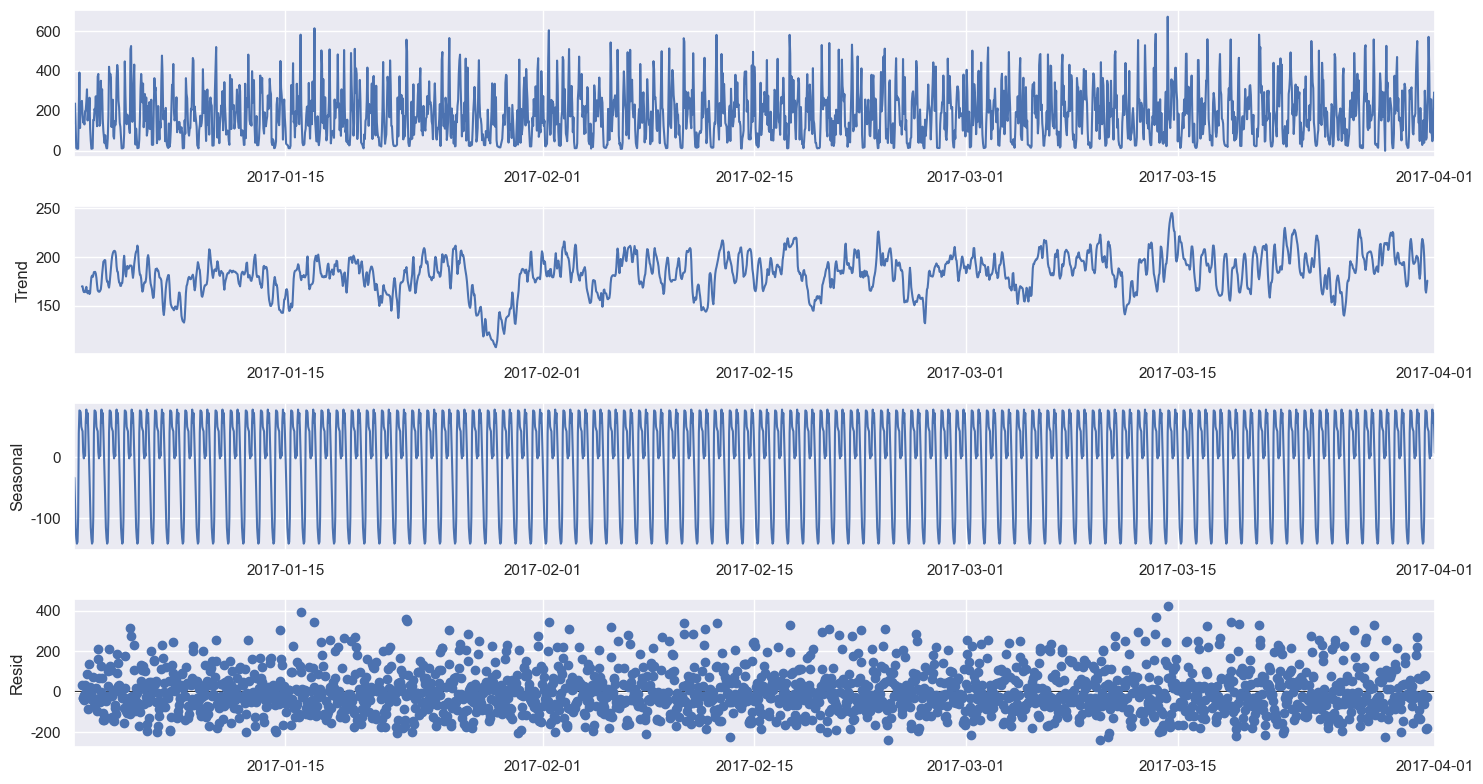

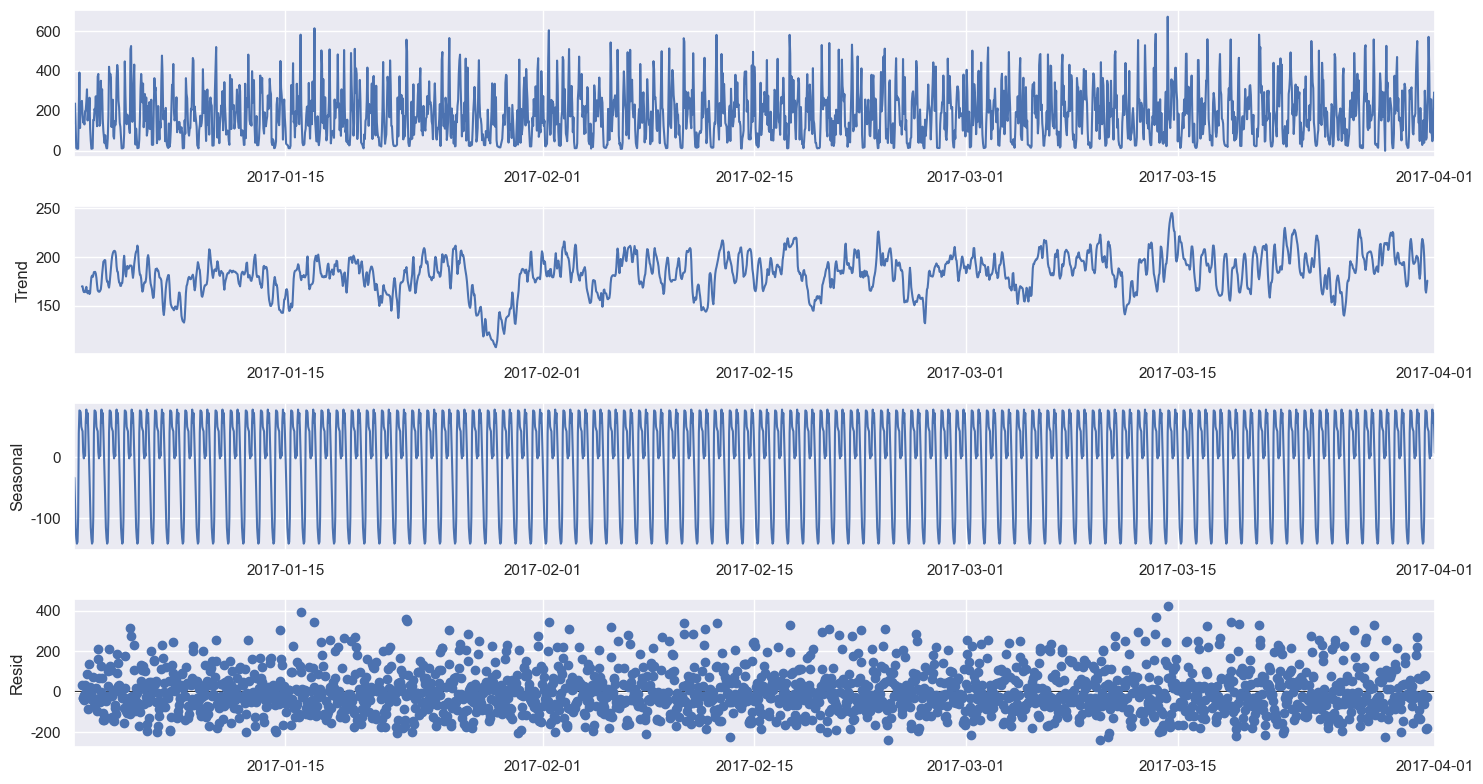

In [59]:
# 시계열 일별 데이터로 STL 확인
import statsmodels.api as sm
#

train_result_D = sm.tsa.seasonal_decompose(data_train_D.iloc[:360], model="additive")
train_result.plot(
    train_result_D,
         # observed= False,
         # seasonal: bool = True,
         # trend: bool = True,
         # resid: bool = True,
         # weights= True
                )

## Skforecast: time series forecasting with Python and Scikit-learn

>https://www.cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html

In [60]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings

from sklearn.metrics import mean_absolute_error
# warnings.filterwarnings('ignore')

In [61]:
# Verify that a temporary index is complete
# ==============================================================================
(data_train.index == pd.date_range(start=data_train.index.min(),
                             end=data_train.index.max(),
                             freq=data_train.index.freq)).all()

True

Train dates : 2017-01-01 01:00:00 --- 2020-12-31 23:00:00  (n=35063)
Test dates  : 2021-01-01 00:00:00 --- 2021-12-17 23:00:00  (n=8424)


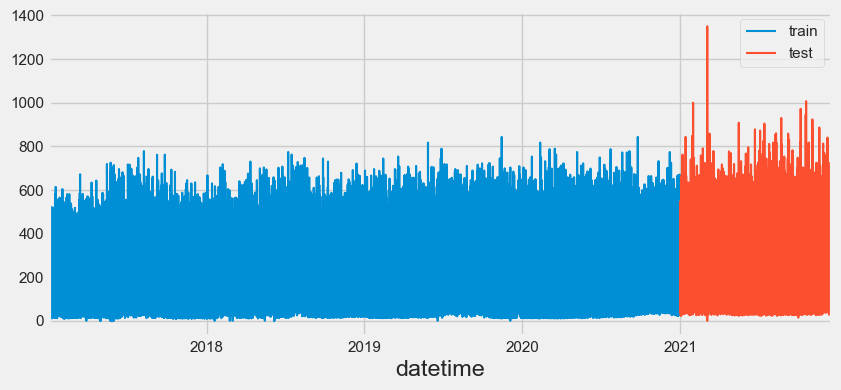

In [62]:
# Split data into train-test
# ==============================================================================
steps = 36

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

In [99]:
# Create and train forecaster#
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 24
             )

forecaster.fit(y=data_train['y'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for y: None 
Transformer for exog: None 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2017-01-01 01:00:00'), Timestamp('2020-12-31 23:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: H 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-12-06 19:18:33 
Last fit date: 2022-12-06 19:19:14 
Skforecast version: 0.5.1 
Python version: 3.9.15 

In [77]:
# save_forecaster(forecaster, file_name='forecaster.py', verbose=1)

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, n_estimators=500, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for y: None 
Transformer for exog: None 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-12-06 13:33:35 
Last fit date: 2022-12-06 18:40:21 
Skforecast version: 0.5.1 
Python version: 3.9.15 



In [100]:
forecaster
# 내용물 뽑을수 있는지 확인하기

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for y: None 
Transformer for exog: None 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2017-01-01 01:00:00'), Timestamp('2020-12-31 23:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: H 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-12-06 19:18:33 
Last fit date: 2022-12-06 19:19:14 
Skforecast version: 0.5.1 
Python version: 3.9.15 

In [115]:
# Predictions
# ==============================================================================
steps = 8424
predictions = forecaster.predict(steps=steps)
predictions

2021-01-01 00:00:00    182.28
2021-01-01 01:00:00    191.14
2021-01-01 02:00:00    168.49
2021-01-01 03:00:00    138.92
2021-01-01 04:00:00     77.45
                        ...  
2021-12-17 19:00:00    271.66
2021-12-17 20:00:00    279.53
2021-12-17 21:00:00    293.37
2021-12-17 22:00:00    310.65
2021-12-17 23:00:00    287.48
Freq: H, Name: pred, Length: 8424, dtype: float64

In [ ]:

fig, ax = plt.subplots(figsize=(9, 4))
data_test.iloc[:336,0].plot(ax=ax, label='test')
predictions[:336].plot(ax=ax, label='predictions')
ax.legend();

# MAE

In [117]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test.iloc[:steps,0],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 38831.49234575023


In [118]:

mean_absolute_error(data_test.iloc[:steps,0], predictions)

158.23122744539413

In [119]:
predictions

2021-01-01 00:00:00    182.28
2021-01-01 01:00:00    191.14
2021-01-01 02:00:00    168.49
2021-01-01 03:00:00    138.92
2021-01-01 04:00:00     77.45
                        ...  
2021-12-17 19:00:00    271.66
2021-12-17 20:00:00    279.53
2021-12-17 21:00:00    293.37
2021-12-17 22:00:00    310.65
2021-12-17 23:00:00    287.48
Freq: H, Name: pred, Length: 8424, dtype: float64

In [74]:
# Hyperparameter Grid search
# ==============================================================================
steps = 336
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [12, 24]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [1, 3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_absolute_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 16.


loop param_grid:   0%|                                              | 0/8 [00:00<?, ?it/s]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  12%|████▊                                 | 1/8 [01:39<11:39, 99.99s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  25%|█████████▎                           | 2/8 [09:32<31:55, 319.19s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  38%|█████████████▉                       | 3/8 [12:44<21:44, 260.98s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  50%|██████████████████▌                  | 4/8 [28:25<35:18, 529.70s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  62%|███████████████████████▏             | 5/8 [33:19<22:13, 444.55s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  75%|███████████████████████████▊         | 6/8 [57:09<25:58, 779.47s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  88%|██████████████████████████████▋    | 7/8 [1:05:49<11:34, 694.87s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:   0%|                                              | 0/8 [00:00<?, ?it/s]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  12%|████▋                                | 1/8 [02:24<16:53, 144.72s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  25%|█████████▎                           | 2/8 [14:00<46:53, 468.95s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  38%|█████████████▉                       | 3/8 [19:28<33:43, 404.65s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  50%|██████████████████▌                  | 4/8 [46:20<58:45, 881.29s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  62%|███████████████████████▏             | 5/8 [55:02<37:35, 751.67s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  75%|█████████████████████████▌        | 6/8 [1:38:07<45:50, 1375.11s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop param_grid:  88%|█████████████████████████████▊    | 7/8 [1:54:30<20:46, 1246.75s/it]

Forecaster will be fit 53 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop lags_grid: 100%|███████████████████████████████████| 2/2 [5:04:46<00:00, 9143.12s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
  Parameters: {'max_depth': 10, 'n_estimators': 500}
  Backtesting metric: 133.21782900442014



In [75]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_absolute_error,max_depth,n_estimators
15,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",133.217829,10,500
14,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",133.511766,10,100
12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",136.989714,5,100
13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",137.067491,5,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 10, 'n_estimators': 100}",137.574797,10,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 10, 'n_estimators': 500}",137.650087,10,500
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",138.107966,3,100
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",138.140376,3,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 5, 'n_estimators': 500}",138.477689,5,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 5, 'n_estimators': 100}",138.604257,5,100


In [77]:
save_forecaster(forecaster, file_name='forecaster.py', verbose=1)

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, n_estimators=500, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for y: None 
Transformer for exog: None 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-12-06 13:33:35 
Last fit date: 2022-12-06 18:40:21 
Skforecast version: 0.5.1 
Python version: 3.9.15 



In [78]:
forecaster_loaded = load_forecaster('forecaster.py', verbose=True)

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, n_estimators=500, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for y: None 
Transformer for exog: None 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-12-06 13:33:35 
Last fit date: 2022-12-06 18:40:21 
Skforecast version: 0.5.1 
Python version: 3.9.15 



In [80]:
forecaster_loaded.fit(data_train['y'])

In [88]:
predictions = forecaster_loaded.predict(steps=336)

In [89]:
predictions

2021-01-01 00:00:00    183.915922
2021-01-01 01:00:00    215.331804
2021-01-01 02:00:00    192.487720
2021-01-01 03:00:00    148.594743
2021-01-01 04:00:00     81.663342
                          ...    
2021-01-14 19:00:00    310.922190
2021-01-14 20:00:00    310.922190
2021-01-14 21:00:00    310.922190
2021-01-14 22:00:00    310.922190
2021-01-14 23:00:00    310.922190
Freq: H, Name: pred, Length: 336, dtype: float64

In [83]:
predictions

2021-01-01 00:00:00    183.915922
2021-01-01 01:00:00    215.331804
2021-01-01 02:00:00    192.487720
2021-01-01 03:00:00    148.594743
2021-01-01 04:00:00     81.663342
                          ...    
2021-01-14 19:00:00    310.922190
2021-01-14 20:00:00    310.922190
2021-01-14 21:00:00    310.922190
2021-01-14 22:00:00    310.922190
2021-01-14 23:00:00    310.922190
Freq: H, Name: pred, Length: 336, dtype: float64

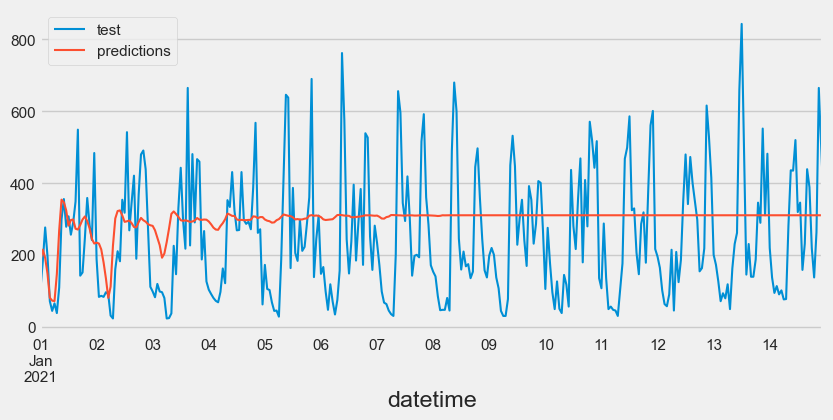

In [84]:

fig, ax = plt.subplots(figsize=(9, 4))
data_test.iloc[:336,0].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [85]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test.iloc[:336,0],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 28643.688395401376


In [86]:

mean_absolute_error(data_test.iloc[:336,0], predictions)

142.3901584393867

In [93]:
# Create and train forecaster
# ==============================================================================
forecaster_direct = ForecasterAutoregDirect(
                regressor     = Lasso(random_state=123),
                transformer_y = StandardScaler(),
                steps         = 336,
                lags          = 8
             )

forecaster_direct

ForecasterAutoregDirect 
Regressor: Lasso(random_state=123) 
Lags: [1 2 3 4 5 6 7 8] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Window size: 8 
Maximum steps predicted: 336 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': 123, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 
Creation date: 2022-12-06 19:14:42 
Last fit date: None 
Skforecast version: 0.5.1 
Python version: 3.9.15 

In [94]:
forecaster_direct.fit(data_train['y'])

In [98]:
forecaster_direct.predict(steps=336)

2021-01-01 00:00:00    235.162471
2021-01-01 01:00:00    235.156365
2021-01-01 02:00:00    235.157316
2021-01-01 03:00:00    235.152189
2021-01-01 04:00:00    235.147955
                          ...    
2021-01-14 19:00:00    235.846141
2021-01-14 20:00:00    235.855386
2021-01-14 21:00:00    235.864660
2021-01-14 22:00:00    235.868347
2021-01-14 23:00:00    235.871198
Freq: H, Name: pred, Length: 336, dtype: float64

In [97]:
# Hyperparameter Grid search
# ==============================================================================
forecaster = ForecasterAutoregDirect(
                regressor     = Lasso(random_state=123),
                transformer_y = StandardScaler(),
                steps         = 36,
                lags          = 8 # This value will be replaced in the grid search
             )

# To access parameters of a scikitlearn pipeline the pattern:
# <name of the step>__<name of the parameter>.
param_grid = {'alpha': np.logspace(-5, 5, 10)}
lags_grid = [5, 12, 20]

results_grid = grid_search_forecaster(
                    forecaster         = forecaster,
                    y                  = data_train['y'],
                    param_grid         = param_grid,
                    # lags_grid          = lags_grid,
                    steps              = 36,
                    refit              = True,
                    metric             = 'mean_absolute_error',
                    initial_train_size = int(len(data_train)*0.5),
                    fixed_train_size   = False,
                    return_best        = True,
                    verbose            = False
                )

Number of models compared: 10.


loop param_grid:   0%|                                             | 0/10 [00:00<?, ?it/s]

Forecaster will be fit 487 times. This can take substantial amounts of time. If not feasible, try with `refit = False`. 




loop lags_grid:   0%|                                               | 0/1 [01:05<?, ?it/s]


KeyboardInterrupt: 